In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/K01_heart_disease.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [14]:
# Menampilkan daftar nama kolom dalam dataset
column_names = data.columns
print(column_names)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [15]:
# Preprocessing data
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [16]:
# Memisahkan fitur (features) dan target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [17]:
# Pembagian data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Pelatihan model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

In [27]:
# Evaluasi model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [29]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8043478260869565
Confusion Matrix:
[[64 13]
 [23 84]]


In [33]:
import matplotlib.pyplot as plt
from sklearn import tree


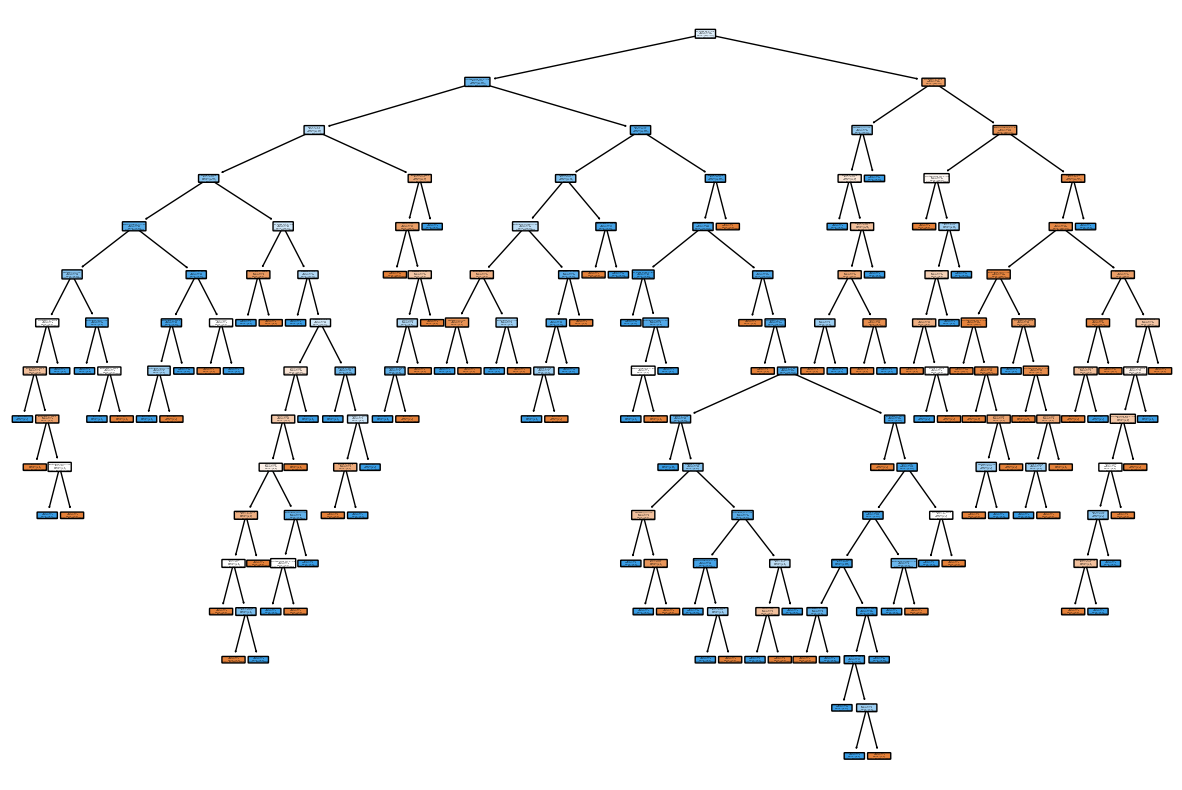

In [34]:
# Visualisasi model Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True, rounded=True)
plt.show()